## 주요 내용

- 어레이 인덱싱, 슬라이싱을 배운다.
- 3차원 어레이를 통해 행렬과 내적 등의 응용을 실습한다. 

# 넘파이 다차원 어레이 객체(`ndarray`)

## 인덱스, 인덱싱, 슬라이싱

리스트의 인덱스, 인덱싱, 슬라이싱 개념을 넘파이 어레이에 확장시킨다.
리스트의 경우보다 보다 다양한 기능을 제공하며 데이터 분석에서 매우 중요한 역할을 수행한다.

#### 1차원 어레이 인덱싱, 슬라이싱

1차원 어레이의 경우 리스트의 경우와 거의 동일하게 작동한다.

In [1]:
import numpy as np

In [2]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

* 인덱싱: 리스트의 경우와 동일

In [3]:
arr[5]

5

* 슬라이싱: 구간 확인 기능은 리스트의 경우와 동일

In [4]:
arr[5:8]

array([5, 6, 7])

* 슬라이싱 활용: 구간을 특정 값으로 대체하는 기능

In [5]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

__주의사항:__ 위 기능은 리스트에서는 제공되지 않는다.

In [6]:
aList = list(arr)
aList

[0, 1, 2, 3, 4, 12, 12, 12, 8, 9]

In [7]:
aList[5:8] = 12
aList

TypeError: can only assign an iterable

아래와 같이 리스트를 값으로 지정하면 작동한다.

In [8]:
aList[5:8] = [12, 12, 12]
aList

[0, 1, 2, 3, 4, 12, 12, 12, 8, 9]

#### 뷰(view) 이해

넘파이 어레이에 대해 슬라이싱을 실행하면 지정된 구간에 해당하는 어레이를 새로 생성하는 게 아니라
지정된 구간의 정보를 이용만 한다. 
이렇게 작동하는 기능이 __뷰__(view)이다. 
즉, 어레이를 새로 생성하지 않고 기존 어레이를 적절하게 활용한다.

__참고:__ 넘파이 어레이와 관련된 많은 기능이 뷰 기능을 이용한다. 아래에서 소개하는 전치 어레이를 
구하는 과정도 뷰를 이용한다.

In [9]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [10]:
arr_slice[1] = 3450
arr

array([   0,    1,    2,    3,    4,   12, 3450,   12,    8,    9])

어레이 전체 항목을 특정 값으로 한꺼번에 바꾸려면 `[:]`로 슬라이싱 한다.

In [11]:
arr_slice[:] = 64
arr_slice

array([64, 64, 64])

In [12]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

#### 2차원 어레이 인덱싱

2차원 이상의 다차원 어레이는 보다 다양한 인덱싱, 슬라이싱 기능을 제공한다. 

In [13]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

리스트의 인덱싱을 그대로 사용할 수 있다.

* 0번 인덱스 항목: 길이가 3인 1차원 어레이

In [14]:
arr2d[0]

array([1, 2, 3])

* 0번 인덱스의 2번 인덱스 항목: 리스트 인덱싱 방식
    - 0번 인덱스의 항목이 리스트이며, 그 리스트의 2번 인덱스 항목 확인

In [15]:
arr2d[0][2]

3

위 인덱싱을 2차원 어레이 인덱싱 방식으로 아래와 같이 쉽게 할 수 있다.

In [16]:
arr2d[0, 2]

3

<img src="https://github.com/codingalzi/pydata/blob/master/notebooks/images/numpy146.png?raw=true" style="width:300px;">

#### 3차원 어레이 인덱싱

`arr3d`는 (2, 2, 3) 모양의 3차원 어레이다.

In [17]:
arr3d = np.array([[[1, 2, 3], 
                   [4, 5, 6]], 
                  
                  [[7, 8, 9], 
                   [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [18]:
arr3d.shape

(2, 2, 3)

모양이 (2, 2, 3)인 3차원 어레이의 0번 인덱스 항목은 (2, 3) 크기의 2차원 어레이다.

In [19]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

0번 인덱스 항목인 2차원 어레이의 항목을 일정한 값으로 바꾸기 위해 인덱싱을 활용할 수 있다.

In [20]:
# 기존 항목 기억해 두기
old_values = arr3d[0].copy()

In [21]:
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [22]:
# arr3d를 계속 사용하기 위해 원래 값으로 되돌린다.

arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

모양이 (2, 2, 3)인 3차원 행렬의 1번 행, 0번 열의 항목은 길이가 3인 1차원 어레이다.

In [23]:
arr3d[1, 0]

array([7, 8, 9])

실제로 아래 처럼 1번행과 1번 행의 0번 열의 값을 확인하면 동일한 값이 나온다.

In [24]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [25]:
x[0]

array([7, 8, 9])

모양이 (2, 2, 3)인 3차원 행렬의 1번 행, 0번 열, 2번 인덱스의 항목은 길이가 정수 9이다.

In [26]:
arr3d[1, 0, 2]

9

실제로 아래 처럼 1번행과 1번 행, 0번 열, 2번 인덱스의 값을 확인하면 동일한 값이 나온다.

In [27]:
arr3d[1][0][2]

9

#### 2차원 어레이 슬라이싱 

In [28]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

* 1번 인덱스 이전까지

In [29]:
arr2d[:1]

array([[1, 2, 3]])

* 2번 인덱스 이전까지

In [30]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

* 전체 항목 슬라이싱

In [31]:
arr2d[:3]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

행과 열을 함께 슬라이싱하려면 행과, 열에 대한 슬라이싱을 동시에 지정한다.

* 행 기준: 2번 행 이전까지
* 열 기준: 1번 열부터 끝까지

In [32]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

<img src="https://github.com/codingalzi/pydata/blob/master/notebooks/images/numpy149-1.png?raw=true" style="width:350px;">

인덱싱과 슬라이싱이 행과 열 각각에 대해 독립적으로 사용될 수 있다.

* 행 기준: 1번 행 인덱싱
* 열 기준: 2번 열 이전까지

In [33]:
arr2d[1, :2]

array([4, 5])

<img src="https://github.com/codingalzi/pydata/blob/master/notebooks/images/numpy149-4.png?raw=true" style="width:350px;">

__주의사항:__ 인덱싱을 사용하는 만큼 결과 어레이의 차원이 기존 어레이의 차원보다 1씩 줄어든다.

In [34]:
arr2d[1, :2].shape

(2,)

동일한 항목을 사용하지만 인덱싱을 사용할 때와 아닐 때의 결과는 다른 모양의 어레이가 된다.

In [35]:
arr2d[1:2, :2]

array([[4, 5]])

모양은 사용되는 슬라이싱의 구간에 의존한다.

* 행 기준: 1행 하나만 사용
* 열 기준: 0행, 2행 두 개 사용.

따라서 결과는 (1, 2) 모양의 어레이다.

In [36]:
arr2d[1:2, :2].shape

(1, 2)

* 행 기준: 행 전체
* 열 기준: 2번 열 이전까지

In [37]:
arr2d[:, :2]

array([[1, 2],
       [4, 5],
       [7, 8]])

<img src="https://github.com/codingalzi/pydata/blob/master/notebooks/images/numpy149-3.png?raw=true" style="width:350px;">

In [38]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [39]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

#### 3차원 어레이 인덱싱/슬라이싱

기본적으로 2차원 어레이 슬라이싱 기능과 동일하게 작동한다.
여기서는 칼라 이미지 데이터를 3차원 어레이로, 흑백 이미지를 2차원 어레이로 다루면서
인덱싱과 슬라이싱을 이용하여 이미지를 조작하는 간단한 방법을 설명한다.

먼저 너구리 얼굴 이미지를 가져온다.
아래 코드는 scipy 패키지에서 기본으로 제공하는 너구리 얼굴 사진을 3차원 어레이로 가져온다.

__주의사항:__ 아래와 같은 코드가 있다는 정도 기억해 두기 바란다.

In [43]:
import scipy.misc
face = scipy.misc.face()

`face`는 너구리 얼굴 이미지를 3차원 어레이로 불러온다.

* `imshow()` 함수는 3차원 이미지 어레이를 이미지로 보여주는 함수이다.
* `show()` 함수는 지정된 여러 개의 이미지를 동시에 화면에 띄우는 기능을 갖는 함수이다.

In [44]:
import matplotlib.pyplot as plt

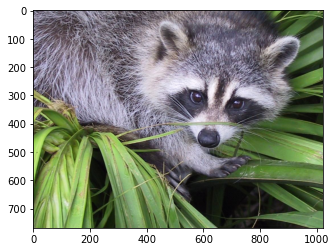

In [45]:
plt.imshow(face)
plt.show()

`face`는 아래 모양의 3차원 어레이를 가리킨다.

In [46]:
face.shape

(768, 1024, 3)

위 이미지에서 세로, 가로 축에 보여지는 숫자가 픽셀 수를 보여주며 정확한 픽셀 수는 다음과 같다.

* 행: 768개
* 열: 1024개
* 각각의 픽셀에 길이가 3인 1차원 어레이 포함. 

##### RGB 색상 정보

`768x1024` 개의 픽셀에 포함된 길이 3인 어레이는 
R(빨강), G(초록), B(파랑) 색상에 대한 정보를 각각 담는다.
또한 색상 정보는 각각 0부터 255 사이의 값을 사용한다.

어레이에 사용된 값들의 정확한 자료형은 `uint8`, 즉, 8바이트로 표현된 양의 정수 자료형이다.

In [47]:
face.dtype

dtype('uint8')

In [48]:
face.min()

0

In [49]:
face.max()

255

##### 색상 정보 정규화

여기서는 픽셀 정보를 0과 1사이의 부동소수점으로 변경해서 사용한다.
이유는 여러 이미지 변환을 시도할 때 0과 1사이의 부동소수점의 값들이 나올 때
정확하게 기능하기 때문이다.

RGB 정보의 최댓값이 255이기에 모든 항목을 255로 나누어 0과 1사이의 값으로 정규화시킨다.

In [50]:
face = face/255

##### 흑백 이미지 변환

흑백 이미지는 보통 하나의 RGB 정보만 가져오는 것으로 구할 수 있다.
예를 들어, 빨강색 정보만 가져오려면 아래처럼 3차원 인덱싱을 실행한다.
아래 코드는 이미지의 행과 열은 그대로 두고 RGB 정보에서 R(빨강)에 대한 정보만 인덱싱으로 가져온다.

In [51]:
face_gray_red = face[:,:,0]

흑백사진으로 보여주려면 `imshow()` 함수의 `cmap` 키워드 인자를 gray style 을 사용하도록 지정해야 한다.

__참고:__ `cmap` 키워드: 색상 지도(color map)을 가리키는 매개변수이며,
`'gray'`를 사용하여 흑백사진으로 출력한다.
색상 지도에 대한 자세한 안내는 
[Matplotlib: Choosing Colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)를
참조한다.

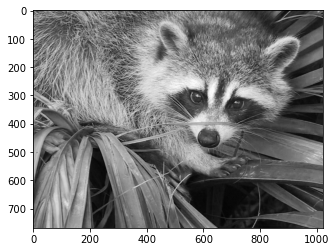

In [52]:
plt.imshow(face_gray_red, cmap='gray')
plt.show()

__참고:__ 진정한 흑백사진으로 변경하려면 RGB 정보를 전부 이용하여 하나의 값을 계산해야 한다.
흑백 이미지의 명암을 구현하는 __벡터 내적__ 수식은 다음과 같다.

$$
[R, G, B]\cdot[0.2989, 0.5870, 0.1140]
= 0.2989 \cdot R + 0.5870 \cdot G + 0.1140 \cdot B
$$

벡터 내적 연산은 어레이의 내적 연산을 통해 쉽게 계산할 수 있다.

* `dot()` 함수: 벡터 내적 계산

In [53]:
face_gray = np.dot(face, [0.2989, 0.5870,0.114])

결과는 2차원 어레이며, 흑백 이미지의 정보를 모두 갖고 있다.

In [54]:
face_gray.shape

(768, 1024)

보다 선명한 명암을 보여주는 이미지가 결과로 나온다.

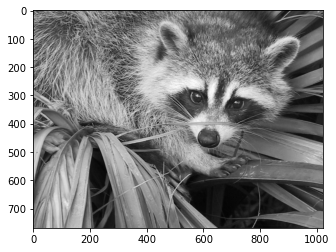

In [55]:
plt.imshow(face_gray, cmap=plt.get_cmap('gray'))
plt.show()